In [27]:
import numpy as np
import sys
import os
import glob
import getpass
import argparse
import pickle
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import fnmatch 
from tqdm import tqdm 
import fnmatch 
import torch 
import pandas as pd 
from utils import save_dir, analyze_dir, result_dir,train_pool

In [28]:
#def moving_average(x, w):
#    return np.convolve(x, np.ones(w), 'valid') / w

def moving_average(x,w):
    w_min=1#int(np.floor(w/2))
    return pd.Series(x).rolling(w, min_periods=w_min).mean()
av_window=10

In [29]:
from utils import save_dir, analyze_dir, result_dir
model_identifier = 'NN-tree_nclass=64_nobj=64000_nhier=6_beta=0.000161_sigma=5.0_nfeat=936-train_test-fixed'
analyze_identifier= 'mftma-exm_per_class=50-proj=False-rand=True-kappa=1e-08-n_t=300-n_rep=5'
train_identifier = 'epochs-10_batch-32_lr-0.01_momentum-0.5_init-gaussian_std-1e-06'

In [30]:
# load accuracy data first 
training_files=[]
for file in os.listdir(os.path.join(save_dir,model_identifier,train_identifier)):
    if fnmatch.fnmatch(file, '*.pth'):
            training_files.append(os.path.join(save_dir,model_identifier,train_identifier,file))

hier_accu=[]
for idx, files in tqdm(enumerate(training_files)):
    test=torch.load(files)
    hier_accu.append([test['epoch'],test['batchidx'], test['hier_test_acc']])
dummy=[]
epochs=[]
batches=[]
for item in hier_accu:
    epochs.append(item[0])
    batches.append(item[1])
    dummy.append(item[0]*10000+item[1])
fixed_idx=np.argsort(dummy)

1060it [00:14, 73.03it/s]


In [31]:
hier_accu=[hier_accu[x] for x in fixed_idx]
accuracies=np.stack([x[2] for x in hier_accu])
batches=np.stack([x[1] for x in hier_accu])
epochs=np.stack([x[0] for x in hier_accu])
epoch_factor=1e3*np.ceil(np.max(batches)/1e3)
epoch_batch=epoch_factor*epochs+batches


In [52]:
# load mftma files 
data_=pickle.load(open(os.path.join(analyze_dir,analyze_identifier,model_identifier,train_identifier, f'{model_identifier}_cosine_center_covar_pooled.pkl'), 'rb'))

covar_res=data_['center_covar_results']
#if not os.path.exists(os.path.join(result_dir,analyze_identifier,model_identifier)):
#        os.makedirs(os.path.join(result_dir,analyze_identifier,model_identifier))
temp=[np.asarray([x['seq'] for x in covar_res[y]]) for y in covar_res.keys()]
y=temp[0]
for k in temp:
    y=np.intersect1d(y,k)
    
    

In [53]:
mftma_epochs=[np.asarray([x['epoch'] for x in covar_res[y]]) for y in covar_res.keys()]
mftma_batch=[np.asarray([x['batch'] for x in covar_res[y]]) for y in covar_res.keys()]


layer_data=covar_res['layer_1_Linear']
layer_mftma=[x['center_covar'] for x in layer_data]
mftma_epoch_batch=epoch_factor*np.array(mftma_epochs[l_num])+np.array(mftma_batch[l_num])
array_correspondance=[np.argwhere(x==epoch_batch) for x in mftma_epoch_batch]



NameError: name 'l_num' is not defined

In [54]:
x_bar= np.arange(len(batches))/len(batches)
epoch_bar=np.argwhere(np.diff(epochs))/(len(batches))
epoch_bar

array([[0.0990566],
       [0.1990566],
       [0.2990566],
       [0.3990566],
       [0.4990566],
       [0.5990566],
       [0.6990566],
       [0.7990566],
       [0.8990566]])

In [34]:
data_['distance_metric']

'euclidean'

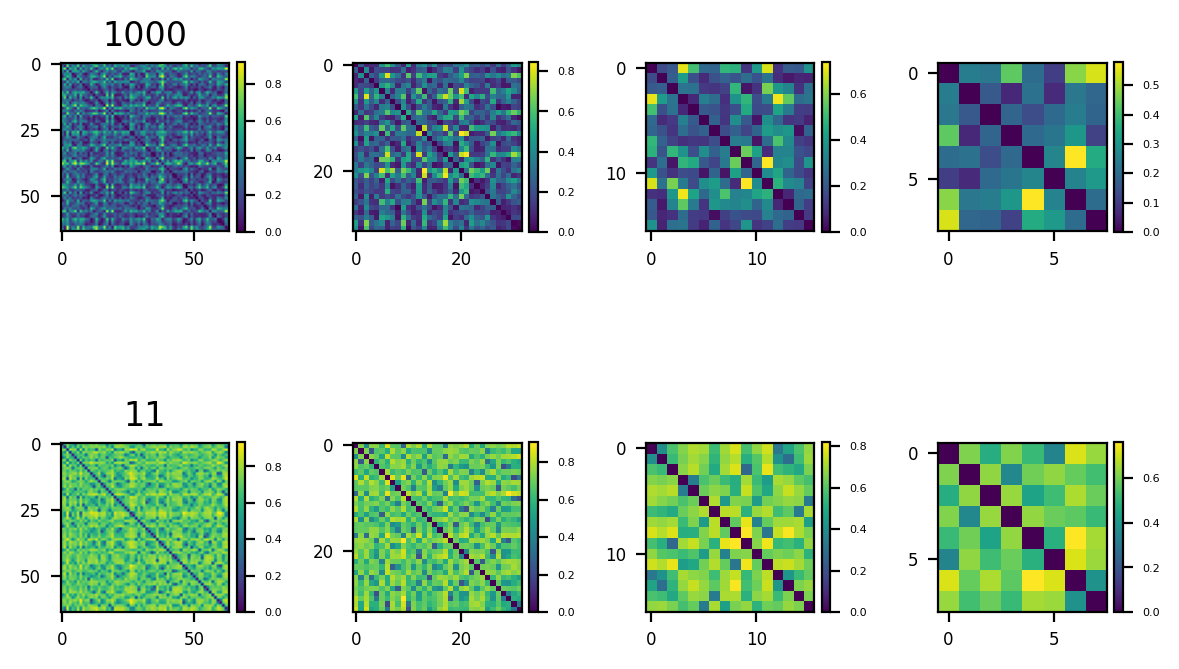

In [56]:
k=1000
layer='layer_1_Linear'
fig, axes = plt.subplots(2, 4,dpi=200,frameon=False)
axes=axes.flatten()

ax=axes[0]
image = ax.imshow(np.asarray(covar_res[layer][k]['center_covar'][0]['center_cov']).squeeze())
cbar=fig.colorbar(image, ax=ax,fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=4)
ax.set_title(f'{k}')

ax=axes[1]
image = ax.imshow(np.asarray(covar_res[layer][k]['center_covar'][1]['center_cov']).squeeze())
cbar=fig.colorbar(image, ax=ax,fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=4)

ax=axes[2]
image = ax.imshow(np.asarray(covar_res[layer][k]['center_covar'][2]['center_cov']).squeeze())
cbar=fig.colorbar(image, ax=ax,fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=4)

ax=axes[3]
image = ax.imshow(np.asarray(covar_res[layer][k]['center_covar'][3]['center_cov']).squeeze())
cbar=fig.colorbar(image, ax=ax,fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=4)

k=11
ax=axes[4]
image = ax.imshow(np.asarray(covar_res[layer][k]['center_covar'][0]['center_cov']).squeeze())
cbar=fig.colorbar(image, ax=ax,fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=4)
ax.set_title(f'{k}')

ax=axes[5]
image = ax.imshow(np.asarray(covar_res[layer][k]['center_covar'][1]['center_cov']).squeeze())
cbar=fig.colorbar(image, ax=ax,fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=4)

ax=axes[6]
image = ax.imshow(np.asarray(covar_res[layer][k]['center_covar'][2]['center_cov']).squeeze())
cbar=fig.colorbar(image, ax=ax,fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=4)

ax=axes[7]
image = ax.imshow(np.asarray(covar_res[layer][k]['center_covar'][3]['center_cov']).squeeze())
cbar=fig.colorbar(image, ax=ax,fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=4)

[plt.setp(ax.get_xticklabels(), fontsize=6) for ax in axes]
[plt.setp(ax.get_yticklabels(), fontsize=6) for ax in axes]


plt.tight_layout()

In [36]:
# recreate the hierarchical classes: 
params = train_pool[model_identifier]()
params.load_dataset()
transfo_mat=params.dataset.transformation_mats


<HDF5 dataset "data": shape (128252,), type "|u1"> is not a matlab type
<HDF5 dataset "ir": shape (128252,), type "<u8"> is not a matlab type
<HDF5 dataset "jc": shape (64128,), type "<u8"> is not a matlab type
data type not supported: graph, uint32
data type not supported: graph, uint32


In [37]:
params.dataset.targets

array([ 0.,  0.,  0., ..., 63., 63., 63.])

In [38]:
within_class_id=[np.unique(x,axis=0)+1 for x in params.dataset.hierarchical_target]

In [39]:
within_cell=[];
between_cell=[];
between_2_cell=[];
for idx , _ in enumerate(range(len(within_class_id)-2)):
    within=within_class_id[idx]
    within=np.expand_dims(within,axis=0)
    temp=np.matmul(np.transpose(within),within)
    temp1=np.repeat(np.expand_dims(np.diag(temp),axis=0),within.shape[1],axis=0)
    within_class=temp==temp1;
    within_cell.append(within_class)

    between=np.repeat(np.expand_dims(np.unique(params.dataset.hierarchical_target[idx+1])+1,axis=0),2,axis=1)
    temp=np.matmul(np.transpose(between),between)
    temp1=np.repeat(np.expand_dims(np.diag(temp),axis=0),within.shape[1],axis=0)
    between_class=temp==temp1
    between_cell.append(between_class)
    
    
    between=np.repeat(np.expand_dims(np.unique(params.dataset.hierarchical_target[idx+2])+1,axis=0),4,axis=1)
    temp=np.matmul(np.transpose(between),between)
    temp1=np.repeat(np.expand_dims(np.diag(temp),axis=0),within.shape[1],axis=0)
    between_class=temp==temp1
    between_2_cell.append(between_class)

In [40]:
hier_within_class=[]
hier_between_class=[]
for idx, _ in enumerate(range(len(within_cell))):
    A=within_cell[idx]==(~between_cell[idx])
    hier_within_class.append(A)
    
    B=within_cell[idx]==(~between_2_cell[idx])
    B=B== ~A
    hier_between_class.append(B)

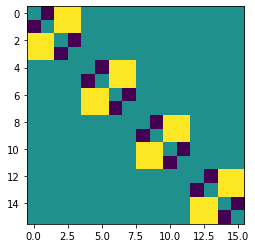

In [41]:
plt.figure()
plt.imshow(hier_between_class[2].astype(float)-hier_within_class[2].astype(float))

In [15]:
np.asarray(covar_res[layer][k]['center_covar'][3]['center_cov']).squeeze()[hier_within_class[3]]

array([0.61499063, 0.61499063, 0.64465903, 0.64465903, 0.48417327,
       0.48417327, 0.38937384, 0.38937384])

In [42]:
len(covar_res[layer])

1060

<Figure size 432x288 with 0 Axes>

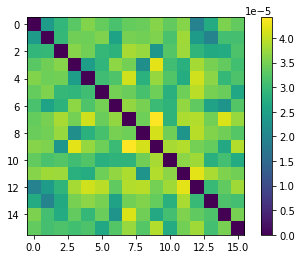

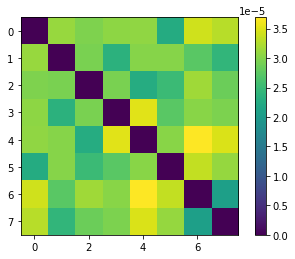

In [51]:
from matplotlib import animation
k=
layer='layer_3_Linear'
plt.figure()
#image = plt.imshow(np.asarray(covar_res[layer][k]['center_covar'][0]['center_cov']).squeeze())
#plt.colorbar()
#plt.figure()
#image = plt.imshow(np.asarray(covar_res[layer][k]['center_covar'][1]['center_cov']).squeeze())
#plt.colorbar()
plt.figure()
image = plt.imshow(np.asarray(covar_res[layer][k]['center_covar'][2]['center_cov']).squeeze())
plt.colorbar()
plt.figure()
image = plt.imshow(np.asarray(covar_res[layer][k]['center_covar'][3]['center_cov']).squeeze())
plt.colorbar()

In [44]:
layer='layer_1_Linear'
hier_within_between=[]
for k_idx,_ in enumerate(hier_within_class):
    withins=[]
    betweens=[]
    for X in covar_res[layer]:
        within=np.asarray(X['center_covar'][k_idx]['center_cov']).squeeze()[hier_within_class[k_idx]]
        between=np.asarray(X['center_covar'][k_idx]['center_cov']).squeeze()[hier_between_class[k_idx]]
        withins.append(np.mean(within))
        betweens.append(np.mean(between))
    hier_within_between.append(np.stack([withins,betweens]))

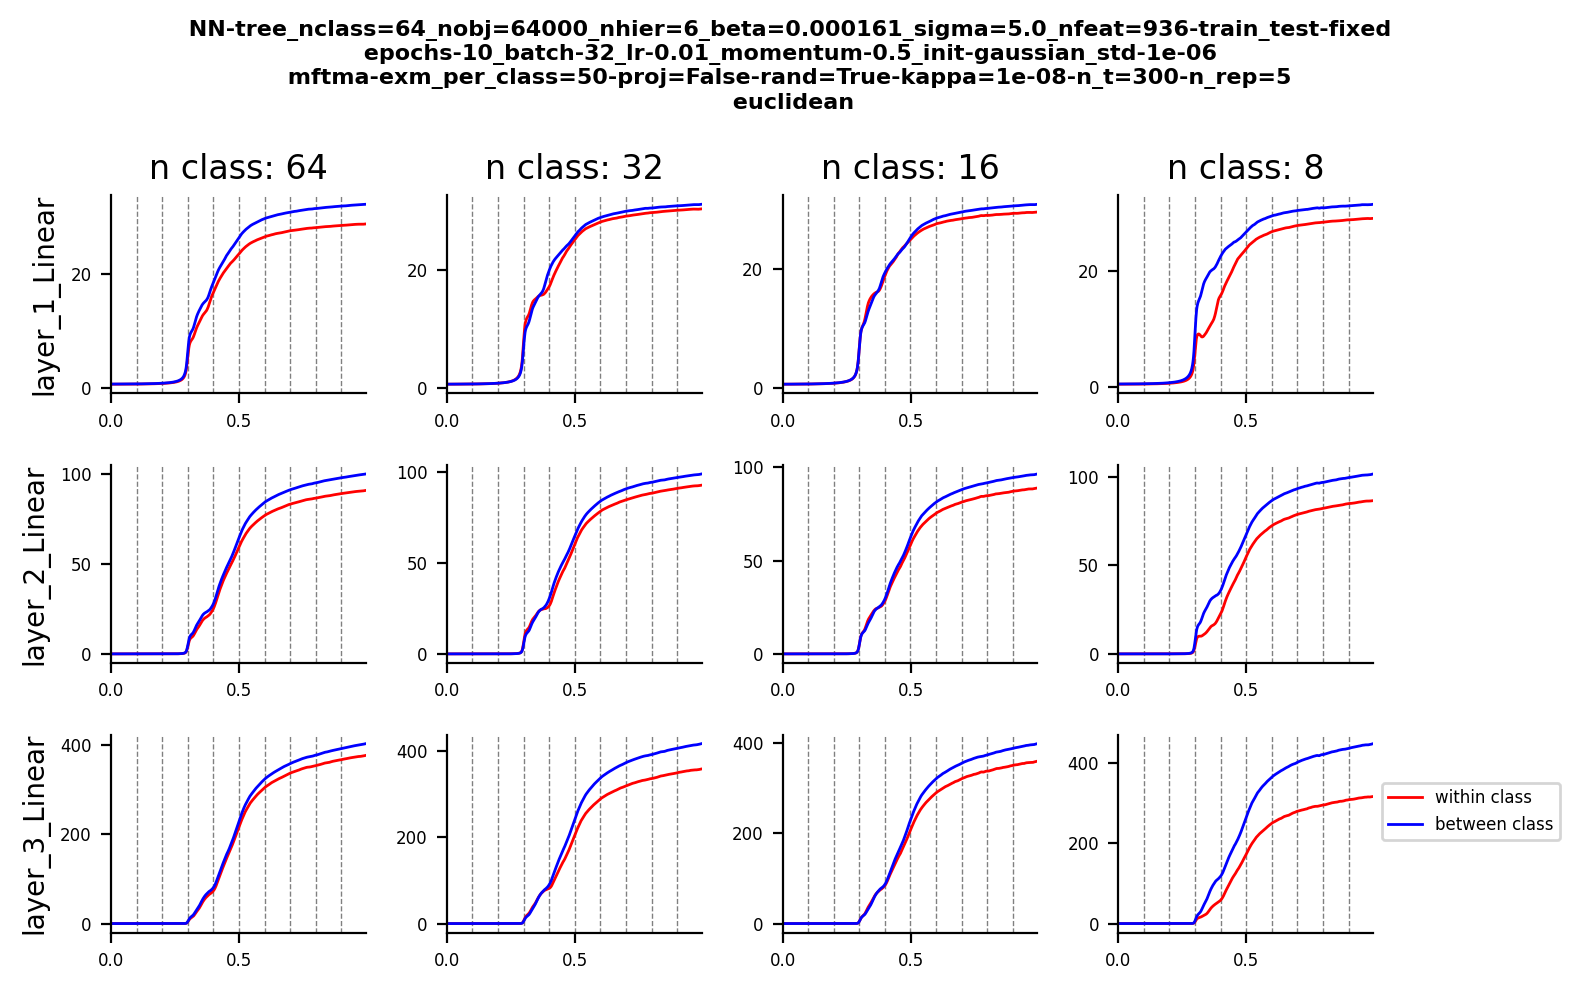

In [45]:

num_colors=accuracies.shape[1]+1
h0=cm.get_cmap('viridis_r',num_colors)
line_cols=np.flipud(h0(np.arange(num_colors)/num_colors))



fig, axes = plt.subplots(3, 4, figsize=(8, 5),dpi=200,frameon=False)

axes=axes.flatten()
[plt.setp(ax.get_xticklabels(), fontsize=6) for ax in axes]
[plt.setp(ax.get_yticklabels(), fontsize=6) for ax in axes]
#fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# plot layer 1 results
layer='layer_1_Linear'
hier_within_between=[]
for k_idx,_ in enumerate(hier_within_class):
    withins=[]
    betweens=[]
    for X in covar_res[layer]:
        within=np.asarray(X['center_covar'][k_idx]['center_cov']).squeeze()[hier_within_class[k_idx]]
        between=np.asarray(X['center_covar'][k_idx]['center_cov']).squeeze()[hier_between_class[k_idx]]
        withins.append(np.mean(within))
        betweens.append(np.mean(between))
    hier_within_between.append(np.stack([withins,betweens]))

    
ax=axes[0]
ax.plot(moving_average(x_bar,av_window),moving_average(hier_within_between[0][0,:],av_window),color=(1,0,0),linewidth=1)
ax.plot(moving_average(x_bar,av_window),moving_average(hier_within_between[0][1,:],av_window),color=(0,0,1),linewidth=1)
ax.set_ylabel(layer)
ax.set_title(f"n class: {hier_within_class[0].shape[0]}")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)



ax=axes[1]
ax.plot(moving_average(x_bar,av_window),moving_average(hier_within_between[1][0,:],av_window),color=(1,0,0),linewidth=1)
ax.plot(moving_average(x_bar,av_window),moving_average(hier_within_between[1][1,:],av_window),color=(0,0,1),linewidth=1)
ax.set_title(f"n class: {hier_within_class[1].shape[0]}")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)





ax=axes[2]
ax.plot(moving_average(x_bar,av_window),moving_average(hier_within_between[2][0,:],av_window),color=(1,0,0),linewidth=1)
ax.plot(moving_average(x_bar,av_window),moving_average(hier_within_between[2][1,:],av_window),color=(0,0,1),linewidth=1)
ax.set_title(f"n class: {hier_within_class[2].shape[0]}")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)



ax=axes[3]
ax.plot(moving_average(x_bar,av_window),moving_average(hier_within_between[3][0,:],av_window),color=(1,0,0),linewidth=1)
ax.plot(moving_average(x_bar,av_window),moving_average(hier_within_between[3][1,:],av_window),color=(0,0,1),linewidth=1)
ax.set_title(f"n class: {hier_within_class[3].shape[0]}")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)



# 

# plot layer 1 results
layer='layer_2_Linear'
hier_within_between=[]
for k_idx,_ in enumerate(hier_within_class):
    withins=[]
    betweens=[]
    for X in covar_res[layer]:
        within=np.asarray(X['center_covar'][k_idx]['center_cov']).squeeze()[hier_within_class[k_idx]]
        between=np.asarray(X['center_covar'][k_idx]['center_cov']).squeeze()[hier_between_class[k_idx]]
        withins.append(np.mean(within))
        betweens.append(np.mean(between))
    hier_within_between.append(np.stack([withins,betweens]))

    
ax=axes[4]
ax.plot(moving_average(x_bar,av_window),moving_average(hier_within_between[0][0,:],av_window),color=(1,0,0),linewidth=1)
ax.plot(moving_average(x_bar,av_window),moving_average(hier_within_between[0][1,:],av_window),color=(0,0,1),linewidth=1)
ax.set_ylabel(layer)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)



ax=axes[5]
ax.plot(moving_average(x_bar,av_window),moving_average(hier_within_between[1][0,:],av_window),color=(1,0,0),linewidth=1)
ax.plot(moving_average(x_bar,av_window),moving_average(hier_within_between[1][1,:],av_window),color=(0,0,1),linewidth=1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)




ax=axes[6]
ax.plot(moving_average(x_bar,av_window),moving_average(hier_within_between[2][0,:],av_window),color=(1,0,0),linewidth=1)
ax.plot(moving_average(x_bar,av_window),moving_average(hier_within_between[2][1,:],av_window),color=(0,0,1),linewidth=1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)



ax=axes[7]
ax.plot(moving_average(x_bar,av_window),moving_average(hier_within_between[3][0,:],av_window),color=(1,0,0),linewidth=1)
ax.plot(moving_average(x_bar,av_window),moving_average(hier_within_between[3][1,:],av_window),color=(0,0,1),linewidth=1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)





# plot layer 1 results
layer='layer_3_Linear'
hier_within_between=[]
for k_idx,_ in enumerate(hier_within_class):
    withins=[]
    betweens=[]
    for X in covar_res[layer]:
        within=np.asarray(X['center_covar'][k_idx]['center_cov']).squeeze()[hier_within_class[k_idx]]
        between=np.asarray(X['center_covar'][k_idx]['center_cov']).squeeze()[hier_between_class[k_idx]]
        withins.append(np.mean(within))
        betweens.append(np.mean(between))
    hier_within_between.append(np.stack([withins,betweens]))

    
ax=axes[8]
ax.plot(moving_average(x_bar,av_window),moving_average(hier_within_between[0][0,:],av_window),color=(1,0,0),linewidth=1)
ax.plot(moving_average(x_bar,av_window),moving_average(hier_within_between[0][1,:],av_window),color=(0,0,1),linewidth=1)
ax.set_ylabel(layer)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)



ax=axes[9]
ax.plot(moving_average(x_bar,av_window),moving_average(hier_within_between[1][0,:],av_window),color=(1,0,0),linewidth=1)
ax.plot(moving_average(x_bar,av_window),moving_average(hier_within_between[1][1,:],av_window),color=(0,0,1),linewidth=1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)




ax=axes[10]
ax.plot(moving_average(x_bar,av_window),moving_average(hier_within_between[2][0,:],av_window),color=(1,0,0),linewidth=1)
ax.plot(moving_average(x_bar,av_window),moving_average(hier_within_between[2][1,:],av_window),color=(0,0,1),linewidth=1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)



ax=axes[11]
ax.plot(moving_average(x_bar,av_window),moving_average(hier_within_between[3][0,:],av_window),color=(1,0,0),linewidth=1,label='within class')
ax.plot(moving_average(x_bar,av_window),moving_average(hier_within_between[3][1,:],av_window),color=(0,0,1),linewidth=1,label='between class')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
ax.legend(bbox_to_anchor=(1, .5, 0.3, 0.3),fontsize=6)
plt.suptitle(f" {model_identifier} \n {train_identifier} \n {analyze_identifier} \n {data_['distance_metric']}",fontsize=8, fontweight='bold')

plt.tight_layout()

In [ ]:
hier_within_class[0].shape

In [ ]:
l_num=1
layer_data=covar_res['layer_1_Linear']
layer_mftma=[x['center_covar'] for x in layer_data]
mftma_epoch_batch=epoch_factor*np.array(mftma_epochs[l_num])+np.array(mftma_batch[l_num])
array_correspondance=[np.argwhere(x==epoch_batch) for x in mftma_epoch_batch]

In [ ]:
layer_cap=np.squeeze(np.stack([[y['capacities']for y in x] for x in layer_mftma]))

corrected_data=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
for idx, x in enumerate(array_correspondance):
    corrected_data[int(x)]=layer_cap[idx,:]

In [ ]:
x_bar= np.arange(len(batches))/len(batches)
epoch_bar=np.argwhere(np.diff(epochs))/(len(batches))
np.ceil(epoch_bar*10)/10

In [ ]:
# get baseline values 
l_num=0
layer_data=mftma_res[layer_keys[l_num]]
layer_mftma=[x['mftma'] for x in layer_data]
mftma_epoch_batch=epoch_factor*np.array(mftma_epochs[l_num])+np.array(mftma_batch[l_num])
array_corres=[np.argwhere(x==epoch_batch) for x in mftma_epoch_batch]

layer_cap=np.squeeze(np.stack([[y['capacities']for y in x] for x in layer_mftma]))
layer_radii=np.squeeze(np.stack([[y['radii']for y in x] for x in layer_mftma]))
layer_dim=np.squeeze(np.stack([[y['dimensions']for y in x] for x in layer_mftma]))
layer_corr=np.squeeze(np.stack([[y['correlations']for y in x] for x in layer_mftma]))
corrected_cap=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
corrected_radii=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
corrected_dim=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
corrected_cor=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
for idx, x in enumerate(array_corres):
    corrected_cap[int(x)]=layer_cap[idx,:]
    corrected_radii[int(x)]=layer_radii[idx,:]
    corrected_dim[int(x)]=layer_dim[idx,:]
    corrected_cor[int(x)]=layer_corr[idx,:]
    
baseline_cap=corrected_cap
baseline_rad=corrected_radii
baseline_dim=corrected_dim
baseline_cor=corrected_cor

In [ ]:
num_colors=accuracies.shape[1]+1
h0=cm.get_cmap('viridis_r',num_colors)
line_cols=np.flipud(h0(np.arange(num_colors)/num_colors))

num_hier=np.unique([len(x['mftma']) for x in mftma_res['layer_0_Input']])
num_layers=len(mftma_res.keys())
layer_keys=list(mftma_res.keys())
mftma_keys=['capacities','radii','dimensions','correlations']
fig, axes = plt.subplots(3, 4, figsize=(8, 5),dpi=200,frameon=False)

axes=axes.flatten()
[plt.setp(ax.get_xticklabels(), fontsize=6) for ax in axes]
[plt.setp(ax.get_yticklabels(), fontsize=6) for ax in axes]
#fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# plot layer 1 results
l_num=1
layer_data=mftma_res[layer_keys[l_num]]
layer_mftma=[x['mftma'] for x in layer_data]
mftma_epoch_batch=epoch_factor*np.array(mftma_epochs[l_num])+np.array(mftma_batch[l_num])
array_corres=[np.argwhere(x==epoch_batch) for x in mftma_epoch_batch]

layer_cap=np.squeeze(np.stack([[y['capacities']for y in x] for x in layer_mftma]))
layer_rad=np.squeeze(np.stack([[y['radii']for y in x] for x in layer_mftma]))
layer_dim=np.squeeze(np.stack([[y['dimensions']for y in x] for x in layer_mftma]))
layer_corr=np.squeeze(np.stack([[y['correlations']for y in x] for x in layer_mftma]))
corrected_cap=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
corrected_rad=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
corrected_dim=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
corrected_cor=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
for idx, x in enumerate(array_corres):
    corrected_cap[int(x)]=layer_cap[idx,:]
    corrected_rad[int(x)]=layer_rad[idx,:]
    corrected_dim[int(x)]=layer_dim[idx,:]
    corrected_cor[int(x)]=layer_corr[idx,:]

ax=axes[(l_num-1)*len(mftma_keys)]
for h in range(layer_cap.shape[1]):

    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(corrected_cap)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=1)
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(baseline_cap)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=.5,linestyle='--')

ax.set_title(r'$\alpha_M$', fontsize=8)
ax.set_ylabel(layer_keys[l_num], fontsize=8)
#ax.axes.xaxis.set_ticks(np.ceil(epoch_bar*10)/10)
#labels = ['' for item in ax.get_xticklabels()]


ax.set_xticklabels(labels)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)

ax=axes[(l_num-1)*len(mftma_keys)+1]
for h in range(layer_cap.shape[1]):
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(corrected_rad)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=1)
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(baseline_rad)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=.5,linestyle='--')


ax.set_title(r'$R_M$', fontsize=8)
ax.axes.xaxis.set_ticklabels([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
ax.set_ylim((0,1))

ax=axes[(l_num-1)*len(mftma_keys)+2]
for h in range(layer_cap.shape[1]):
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(corrected_dim)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=1)
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(baseline_dim)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=.5,linestyle='--')


ax.set_title(r'$D_M$', fontsize=8)
ax.axes.xaxis.set_ticklabels([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)

ax=axes[(l_num-1)*len(mftma_keys)+3]
for h in range(layer_cap.shape[1]):
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(corrected_cor)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=1)
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(baseline_cor)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=.5,linestyle='--')


ax.set_title(r'$\rho_{center}$', fontsize=8)
ax.axes.xaxis.set_ticklabels([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
   
    
# plot layer 2 results
l_num=2
layer_data=mftma_res[layer_keys[l_num]]
layer_mftma=[x['mftma'] for x in layer_data]
mftma_epoch_batch=epoch_factor*np.array(mftma_epochs[l_num])+np.array(mftma_batch[l_num])
array_corres=[np.argwhere(x==epoch_batch) for x in mftma_epoch_batch]

layer_cap=np.squeeze(np.stack([[y['capacities']for y in x] for x in layer_mftma]))
layer_rad=np.squeeze(np.stack([[y['radii']for y in x] for x in layer_mftma]))
layer_dim=np.squeeze(np.stack([[y['dimensions']for y in x] for x in layer_mftma]))
layer_corr=np.squeeze(np.stack([[y['correlations']for y in x] for x in layer_mftma]))
corrected_cap=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
corrected_rad=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
corrected_dim=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
corrected_cor=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
for idx, x in enumerate(array_corres):
    corrected_cap[int(x)]=layer_cap[idx,:]
    corrected_rad[int(x)]=layer_rad[idx,:]
    corrected_dim[int(x)]=layer_dim[idx,:]
    corrected_cor[int(x)]=layer_corr[idx,:]

ax=axes[(l_num-1)*len(mftma_keys)]
for h in range(layer_cap.shape[1]):
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(corrected_cap)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=1)
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(baseline_cap)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=.5,linestyle='--')


ax.set_ylabel(layer_keys[l_num], fontsize=8)
ax.axes.xaxis.set_ticklabels([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)

ax=axes[(l_num-1)*len(mftma_keys)+1]
for h in range(layer_cap.shape[1]):
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(corrected_rad)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=1)
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(baseline_rad)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=.5,linestyle='--')


ax.axes.xaxis.set_ticklabels([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)

ax=axes[(l_num-1)*len(mftma_keys)+2]
for h in range(layer_cap.shape[1]):
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(corrected_dim)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=1)
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(baseline_dim)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=.5,linestyle='--')


ax.axes.xaxis.set_ticklabels([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)

ax=axes[(l_num-1)*len(mftma_keys)+3]
for h in range(layer_cap.shape[1]):
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(corrected_cor)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=1)
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(baseline_cor)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=.5,linestyle='--')


ax.axes.xaxis.set_ticklabels([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
   

# plot layer 2 results
l_num=3
layer_data=mftma_res[layer_keys[l_num]]
layer_mftma=[x['mftma'] for x in layer_data]
mftma_epoch_batch=epoch_factor*np.array(mftma_epochs[l_num])+np.array(mftma_batch[l_num])
array_corres=[np.argwhere(x==epoch_batch) for x in mftma_epoch_batch]

layer_cap=np.squeeze(np.stack([[y['capacities']for y in x] for x in layer_mftma]))
layer_rad=np.squeeze(np.stack([[y['radii']for y in x] for x in layer_mftma]))
layer_dim=np.squeeze(np.stack([[y['dimensions']for y in x] for x in layer_mftma]))
layer_corr=np.squeeze(np.stack([[y['correlations']for y in x] for x in layer_mftma]))
corrected_cap=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
corrected_rad=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
corrected_dim=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
corrected_cor=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
for idx, x in enumerate(array_corres):
    corrected_cap[int(x)]=layer_cap[idx,:]
    corrected_rad[int(x)]=layer_rad[idx,:]
    corrected_dim[int(x)]=layer_dim[idx,:]
    corrected_cor[int(x)]=layer_corr[idx,:]

ax=axes[(l_num-1)*len(mftma_keys)]
for h in range(layer_cap.shape[1]):
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(corrected_cap)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=1)
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(baseline_cap)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=.5,linestyle='--')


ax.set_ylabel(layer_keys[l_num], fontsize=8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)


ax=axes[(l_num-1)*len(mftma_keys)+1]
for h in range(layer_cap.shape[1]):
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(corrected_rad)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=1)
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(baseline_rad)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=.5,linestyle='--')



ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)

ax=axes[(l_num-1)*len(mftma_keys)+2]
for h in range(layer_cap.shape[1]):
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(corrected_dim)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=1)
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(baseline_dim)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=.5,linestyle='--')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)


ax=axes[(l_num-1)*len(mftma_keys)+3]
for h in range(layer_cap.shape[1]):
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(corrected_cor)[:,h],av_window),color=line_cols[h,:],label=f"{h}",linewidth=1)
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(baseline_cor)[:,h],av_window),color=line_cols[h,:],label=f"{h}, input",linewidth=.5,linestyle='--')


ax.legend(bbox_to_anchor=(1, .5, 0.3, 0.3),fontsize=6)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)

plt.suptitle(f"{model_identifier} \n {train_identifier} \n {analyze_identifier} average_win={av_window}",fontsize=8, fontweight='bold')


#plt.tight_layout()
# plt.show()
# fig.savefig(os.path.join(result_dir,analyze_identifier,model_identifier+'_manifold_vals_during_training.png'),transparent=True)
[plt.setp(ax.get_xticklabels(), fontsize=8) for ax in axes]

In [ ]:
labels

# zooming in 

In [ ]:
xmin=.2
xmax=.6

num_colors=accuracies.shape[1]+1
h0=cm.get_cmap('viridis_r',num_colors)
line_cols=np.flipud(h0(np.arange(num_colors)/num_colors))

num_hier=np.unique([len(x['mftma']) for x in mftma_res['layer_0_Input']])
num_layers=len(mftma_res.keys())
layer_keys=list(mftma_res.keys())
mftma_keys=['capacities','radii','dimensions','correlations']
fig, axes = plt.subplots(4, 4, figsize=(8, 5),dpi=200,frameon=False)

axes=axes.flatten()
[plt.setp(ax.get_xticklabels(), fontsize=6) for ax in axes]
[plt.setp(ax.get_yticklabels(), fontsize=6) for ax in axes]
#fig.tight_layout(rect=[0, 0.03, 1, 0.95])

l_num=0
layer_data=mftma_res[layer_keys[l_num]]
layer_mftma=[x['mftma'] for x in layer_data]
mftma_epoch_batch=epoch_factor*np.array(mftma_epochs[l_num])+np.array(mftma_batch[l_num])
array_corres=[np.argwhere(x==epoch_batch) for x in mftma_epoch_batch]

layer_cap=np.squeeze(np.stack([[y['capacities']for y in x] for x in layer_mftma]))
layer_rad=np.squeeze(np.stack([[y['radii']for y in x] for x in layer_mftma]))
layer_dim=np.squeeze(np.stack([[y['dimensions']for y in x] for x in layer_mftma]))
layer_corr=np.squeeze(np.stack([[y['correlations']for y in x] for x in layer_mftma]))
corrected_cap=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
corrected_rad=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
corrected_dim=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
corrected_cor=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
for idx, x in enumerate(array_corres):
    corrected_cap[int(x)]=layer_cap[idx,:]
    corrected_rad[int(x)]=layer_rad[idx,:]
    corrected_dim[int(x)]=layer_dim[idx,:]
    corrected_cor[int(x)]=layer_corr[idx,:]

ax=axes[(l_num-1)*len(mftma_keys)]
for h in range(layer_cap.shape[1]):
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(corrected_cap)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=1)
ax.set_title(r'$\alpha_M$', fontsize=8)
ax.set_ylabel(layer_keys[l_num], fontsize=8)
ax.axes.xaxis.set_ticklabels([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
ax.set_xlim((xmin,xmax))

ax=axes[(l_num-1)*len(mftma_keys)+1]
for h in range(layer_cap.shape[1]):
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(corrected_rad)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=1)
ax.set_title(r'$R_M$', fontsize=8)
ax.axes.xaxis.set_ticklabels([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
ax.set_xlim((xmin,xmax))

ax=axes[(l_num-1)*len(mftma_keys)+2]
for h in range(layer_cap.shape[1]):
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(corrected_dim)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=1)
ax.set_title(r'$D_M$', fontsize=8)
ax.axes.xaxis.set_ticklabels([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
ax.set_xlim((xmin,xmax))

ax=axes[(l_num-1)*len(mftma_keys)+3]
for h in range(layer_cap.shape[1]):
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(corrected_cor)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=1)
ax.set_title(r'$\rho_{center}$', fontsize=8)
ax.axes.xaxis.set_ticklabels([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
ax.set_xlim((xmin,xmax))
   

# plot layer 1 results
l_num=1
layer_data=mftma_res[layer_keys[l_num]]
layer_mftma=[x['mftma'] for x in layer_data]
mftma_epoch_batch=epoch_factor*np.array(mftma_epochs[l_num])+np.array(mftma_batch[l_num])
array_corres=[np.argwhere(x==epoch_batch) for x in mftma_epoch_batch]

layer_cap=np.squeeze(np.stack([[y['capacities']for y in x] for x in layer_mftma]))
layer_rad=np.squeeze(np.stack([[y['radii']for y in x] for x in layer_mftma]))
layer_dim=np.squeeze(np.stack([[y['dimensions']for y in x] for x in layer_mftma]))
layer_corr=np.squeeze(np.stack([[y['correlations']for y in x] for x in layer_mftma]))
corrected_cap=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
corrected_rad=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
corrected_dim=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
corrected_cor=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
for idx, x in enumerate(array_corres):
    corrected_cap[int(x)]=layer_cap[idx,:]
    corrected_rad[int(x)]=layer_rad[idx,:]
    corrected_dim[int(x)]=layer_dim[idx,:]
    corrected_cor[int(x)]=layer_corr[idx,:]

ax=axes[(l_num-1)*len(mftma_keys)]
for h in range(layer_cap.shape[1]):
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(corrected_cap)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=1)
ax.set_title(r'$\alpha_M$', fontsize=8)
ax.set_ylabel(layer_keys[l_num], fontsize=8)
ax.axes.xaxis.set_ticklabels([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
ax.set_xlim((xmin,xmax))

ax=axes[(l_num-1)*len(mftma_keys)+1]
for h in range(layer_cap.shape[1]):
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(corrected_rad)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=1)
ax.set_title(r'$R_M$', fontsize=8)
ax.axes.xaxis.set_ticklabels([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
ax.set_xlim((xmin,xmax))

ax=axes[(l_num-1)*len(mftma_keys)+2]
for h in range(layer_cap.shape[1]):
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(corrected_dim)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=1)
ax.set_title(r'$D_M$', fontsize=8)
ax.axes.xaxis.set_ticklabels([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
ax.set_xlim((xmin,xmax))

ax=axes[(l_num-1)*len(mftma_keys)+3]
for h in range(layer_cap.shape[1]):
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(corrected_cor)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=1)
ax.set_title(r'$\rho_{center}$', fontsize=8)
ax.axes.xaxis.set_ticklabels([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
ax.set_xlim((xmin,xmax))
   
    
# plot layer 2 results
l_num=2
layer_data=mftma_res[layer_keys[l_num]]
layer_mftma=[x['mftma'] for x in layer_data]
mftma_epoch_batch=epoch_factor*np.array(mftma_epochs[l_num])+np.array(mftma_batch[l_num])
array_corres=[np.argwhere(x==epoch_batch) for x in mftma_epoch_batch]

layer_cap=np.squeeze(np.stack([[y['capacities']for y in x] for x in layer_mftma]))
layer_rad=np.squeeze(np.stack([[y['radii']for y in x] for x in layer_mftma]))
layer_dim=np.squeeze(np.stack([[y['dimensions']for y in x] for x in layer_mftma]))
layer_corr=np.squeeze(np.stack([[y['correlations']for y in x] for x in layer_mftma]))
corrected_cap=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
corrected_rad=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
corrected_dim=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
corrected_cor=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
for idx, x in enumerate(array_corres):
    corrected_cap[int(x)]=layer_cap[idx,:]
    corrected_rad[int(x)]=layer_rad[idx,:]
    corrected_dim[int(x)]=layer_dim[idx,:]
    corrected_cor[int(x)]=layer_corr[idx,:]

ax=axes[(l_num-1)*len(mftma_keys)]
for h in range(layer_cap.shape[1]):
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(corrected_cap)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=1)
ax.set_ylabel(layer_keys[l_num], fontsize=8)
ax.axes.xaxis.set_ticklabels([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
ax.set_xlim((xmin,xmax))

ax=axes[(l_num-1)*len(mftma_keys)+1]
for h in range(layer_cap.shape[1]):
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(corrected_rad)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=1)
ax.axes.xaxis.set_ticklabels([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
ax.set_xlim((xmin,xmax))

ax=axes[(l_num-1)*len(mftma_keys)+2]
for h in range(layer_cap.shape[1]):
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(corrected_dim)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=1)
ax.axes.xaxis.set_ticklabels([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
ax.set_xlim((xmin,xmax))

ax=axes[(l_num-1)*len(mftma_keys)+3]
for h in range(layer_cap.shape[1]):
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(corrected_cor)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=1)
ax.axes.xaxis.set_ticklabels([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
ax.set_xlim((xmin,xmax))
   

# plot layer 2 results
l_num=3
layer_data=mftma_res[layer_keys[l_num]]
layer_mftma=[x['mftma'] for x in layer_data]
mftma_epoch_batch=epoch_factor*np.array(mftma_epochs[l_num])+np.array(mftma_batch[l_num])
array_corres=[np.argwhere(x==epoch_batch) for x in mftma_epoch_batch]

layer_cap=np.squeeze(np.stack([[y['capacities']for y in x] for x in layer_mftma]))
layer_rad=np.squeeze(np.stack([[y['radii']for y in x] for x in layer_mftma]))
layer_dim=np.squeeze(np.stack([[y['dimensions']for y in x] for x in layer_mftma]))
layer_corr=np.squeeze(np.stack([[y['correlations']for y in x] for x in layer_mftma]))
corrected_cap=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
corrected_rad=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
corrected_dim=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
corrected_cor=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
for idx, x in enumerate(array_corres):
    corrected_cap[int(x)]=layer_cap[idx,:]
    corrected_rad[int(x)]=layer_rad[idx,:]
    corrected_dim[int(x)]=layer_dim[idx,:]
    corrected_cor[int(x)]=layer_corr[idx,:]

ax=axes[(l_num-1)*len(mftma_keys)]
for h in range(layer_cap.shape[1]):
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(corrected_cap)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=1)
ax.set_ylabel(layer_keys[l_num], fontsize=8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
ax.set_xlim((xmin,xmax))

ax=axes[(l_num-1)*len(mftma_keys)+1]
for h in range(layer_cap.shape[1]):
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(corrected_rad)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=1)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
ax.set_xlim((xmin,xmax))

ax=axes[(l_num-1)*len(mftma_keys)+2]
for h in range(layer_cap.shape[1]):
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(corrected_dim)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
ax.set_xlim((xmin,xmax))


ax=axes[(l_num-1)*len(mftma_keys)+3]
for h in range(layer_cap.shape[1]):
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(corrected_cor)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=1)
ax.legend(bbox_to_anchor=(1, .5, 0.3, 0.3),fontsize=6)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
ax.set_xlim((xmin,xmax))

plt.suptitle(f"{model_identifier} \n {train_identifier} \n {analyze_identifier} average_win={av_window}",fontsize=8, fontweight='bold')


#plt.tight_layout()
# plt.show()
# fig.savefig(os.path.join(result_dir,analyze_identifier,model_identifier+'_manifold_vals_during_training.png'),transparent=True)
[plt.setp(ax.get_xticklabels(), fontsize=8) for ax in axes]

# plot accuracy against capacity 

In [ ]:
import matplotlib.markers as markers 

In [ ]:
av_window=30

In [ ]:
h0=cm.get_cmap('magma_r',accuracies.shape[0])
dot_cols=np.flipud(h0(np.arange(accuracies.shape[0])/accuracies.shape[0]))
dot_ave=[]
for k in range(dot_cols.shape[1]):
    dot_ave.append(moving_average(dot_cols[:,k],av_window))
dot_ave=np.stack(dot_ave).transpose()

In [ ]:
marker_seq=["o",'v','s','^','>','D']

In [ ]:

h0=cm.get_cmap('magma_r',accuracies.shape[0])
dot_cols=np.flipud(h0(np.arange(accuracies.shape[0])/accuracies.shape[0]))

num_colors=accuracies.shape[1]+1
h0=cm.get_cmap('viridis_r',num_colors)
line_cols=np.flipud(h0(np.arange(num_colors)/num_colors))

num_hier=np.unique([len(x['mftma']) for x in mftma_res['layer_0_Input']])
num_layers=len(mftma_res.keys())
layer_keys=list(mftma_res.keys())
mftma_keys=['capacities','radii','dimensions']
fig, axes = plt.subplots(3, 3, figsize=(8, 8),dpi=200,frameon=False)

axes=axes.flatten()
[plt.setp(ax.get_xticklabels(), fontsize=6) for ax in axes]
[plt.setp(ax.get_yticklabels(), fontsize=6) for ax in axes]
#fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# plot layer 1 results
l_num=1
layer_data=mftma_res[layer_keys[l_num]]
layer_mftma=[x['mftma'] for x in layer_data]
mftma_epoch_batch=epoch_factor*np.array(mftma_epochs[l_num])+np.array(mftma_batch[l_num])
array_corres=[np.argwhere(x==epoch_batch) for x in mftma_epoch_batch]

layer_cap=np.squeeze(np.stack([[y['capacities']for y in x] for x in layer_mftma]))
layer_rad=np.squeeze(np.stack([[y['radii']for y in x] for x in layer_mftma]))
layer_dim=np.squeeze(np.stack([[y['dimensions']for y in x] for x in layer_mftma]))
#layer_corr=np.squeeze(np.stack([[y['correlations']for y in x] for x in layer_mftma]))
corrected_cap=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
corrected_rad=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
corrected_dim=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
#corrected_cor=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
for idx, x in enumerate(array_corres):
    corrected_cap[int(x)]=layer_cap[idx,:]
    corrected_rad[int(x)]=layer_rad[idx,:]
    corrected_dim[int(x)]=layer_dim[idx,:]
    #corrected_cor[int(x)]=layer_corr[idx,:]

ax=axes[(l_num-1)*len(mftma_keys)]
for h in range(layer_cap.shape[1]):
    if not False:# np.isnan(np.sum(np.stack(corrected_cap)[:,h])):
        ax.plot(moving_average(np.stack(corrected_cap)[:,h],av_window),moving_average(accuracies[:,h],av_window),zorder=0,linewidth=1,color=line_cols[h,:])
        ax.scatter(moving_average(np.stack(corrected_cap)[:,h],av_window),moving_average(accuracies[:,h],av_window),s=7,c=dot_ave,marker=marker_seq[h],alpha=.8,edgecolors='none')
        
ax.set_title(r'$\alpha_M$', fontsize=8)
ax.set_ylabel(f"{layer_keys[l_num]}\n hierarchical accuracy", fontsize=8)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)

ax=axes[(l_num-1)*len(mftma_keys)+1]
for h in range(layer_cap.shape[1]):
    if not np.isnan(np.sum(np.stack(corrected_rad)[:,h])):
        ax.plot(moving_average(np.stack(corrected_rad)[:,h],av_window),moving_average(accuracies[:,h],av_window),zorder=0,linewidth=1,color=line_cols[h,:])
        ax.scatter(moving_average(np.stack(corrected_rad)[:,h],av_window),moving_average(accuracies[:,h],av_window),s=7,c=dot_ave,marker=marker_seq[h],alpha=.8,edgecolors='none')


ax.set_title(r'$R_M$', fontsize=8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)

ax=axes[(l_num-1)*len(mftma_keys)+2]
for h in range(layer_cap.shape[1]):
      if not np.isnan(np.sum(np.stack(corrected_dim)[:,h])):
        ax.plot(moving_average(np.stack(corrected_dim)[:,h],av_window),moving_average(accuracies[:,h],av_window),zorder=0,linewidth=1,color=line_cols[h,:])
        ax.scatter(moving_average(np.stack(corrected_dim)[:,h],av_window),moving_average(accuracies[:,h],av_window),s=7,c=dot_ave,marker=marker_seq[h],alpha=.8,edgecolors='none')



ax.set_title(r'$D_M$', fontsize=8)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)


# 
# plot layer 1 results
l_num=2
layer_data=mftma_res[layer_keys[l_num]]
layer_mftma=[x['mftma'] for x in layer_data]
mftma_epoch_batch=epoch_factor*np.array(mftma_epochs[l_num])+np.array(mftma_batch[l_num])
array_corres=[np.argwhere(x==epoch_batch) for x in mftma_epoch_batch]

layer_cap=np.squeeze(np.stack([[y['capacities']for y in x] for x in layer_mftma]))
layer_rad=np.squeeze(np.stack([[y['radii']for y in x] for x in layer_mftma]))
layer_dim=np.squeeze(np.stack([[y['dimensions']for y in x] for x in layer_mftma]))
#layer_corr=np.squeeze(np.stack([[y['correlations']for y in x] for x in layer_mftma]))
corrected_cap=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
corrected_rad=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
corrected_dim=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
#corrected_cor=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
for idx, x in enumerate(array_corres):
    corrected_cap[int(x)]=layer_cap[idx,:]
    corrected_rad[int(x)]=layer_rad[idx,:]
    corrected_dim[int(x)]=layer_dim[idx,:]
    #corrected_cor[int(x)]=layer_corr[idx,:]

ax=axes[(l_num-1)*len(mftma_keys)]
for h in range(layer_cap.shape[1]):
    if not False: #np.isnan(np.sum(np.stack(corrected_cap)[:,h])):
        ax.plot(moving_average(np.stack(corrected_cap)[:,h],av_window),moving_average(accuracies[:,h],av_window),zorder=0,linewidth=1,color=line_cols[h,:])
        ax.scatter(moving_average(np.stack(corrected_cap)[:,h],av_window),moving_average(accuracies[:,h],av_window),s=7,c=dot_ave,marker=marker_seq[h],alpha=.8,edgecolors='none')
        
ax.set_title(r'$\alpha_M$', fontsize=8)
ax.set_ylabel(f"{layer_keys[l_num]}\n hierarchical accuracy", fontsize=8)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)

ax=axes[(l_num-1)*len(mftma_keys)+1]
for h in range(layer_cap.shape[1]):
    if not np.isnan(np.sum(np.stack(corrected_rad)[:,h])):
        ax.plot(moving_average(np.stack(corrected_rad)[:,h],av_window),moving_average(accuracies[:,h],av_window),zorder=0,linewidth=1,color=line_cols[h,:])
        ax.scatter(moving_average(np.stack(corrected_rad)[:,h],av_window),moving_average(accuracies[:,h],av_window),s=7,c=dot_ave,marker=marker_seq[h],alpha=.8,edgecolors='none')


ax.set_title(r'$R_M$', fontsize=8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)

ax=axes[(l_num-1)*len(mftma_keys)+2]
for h in range(layer_cap.shape[1]):
      if not np.isnan(np.sum(np.stack(corrected_dim)[:,h])):
        ax.plot(moving_average(np.stack(corrected_dim)[:,h],av_window),moving_average(accuracies[:,h],av_window),zorder=0,linewidth=1,color=line_cols[h,:])
        ax.scatter(moving_average(np.stack(corrected_dim)[:,h],av_window),moving_average(accuracies[:,h],av_window),s=7,c=dot_ave,marker=marker_seq[h],alpha=.8,edgecolors='none')



ax.set_title(r'$D_M$', fontsize=8)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)


# plot layer 1 results
l_num=3
layer_data=mftma_res[layer_keys[l_num]]
layer_mftma=[x['mftma'] for x in layer_data]
mftma_epoch_batch=epoch_factor*np.array(mftma_epochs[l_num])+np.array(mftma_batch[l_num])
array_corres=[np.argwhere(x==epoch_batch) for x in mftma_epoch_batch]

layer_cap=np.squeeze(np.stack([[y['capacities']for y in x] for x in layer_mftma]))
layer_rad=np.squeeze(np.stack([[y['radii']for y in x] for x in layer_mftma]))
layer_dim=np.squeeze(np.stack([[y['dimensions']for y in x] for x in layer_mftma]))
#layer_corr=np.squeeze(np.stack([[y['correlations']for y in x] for x in layer_mftma]))
corrected_cap=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
corrected_rad=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
corrected_dim=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
#corrected_cor=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
for idx, x in enumerate(array_corres):
    corrected_cap[int(x)]=layer_cap[idx,:]
    corrected_rad[int(x)]=layer_rad[idx,:]
    corrected_dim[int(x)]=layer_dim[idx,:]
    #corrected_cor[int(x)]=layer_corr[idx,:]

ax=axes[(l_num-1)*len(mftma_keys)]
for h in range(layer_cap.shape[1]):
    if not np.isnan(np.sum(np.stack(corrected_cap)[:,h])):
        ax.plot(moving_average(np.stack(corrected_cap)[:,h],av_window),moving_average(accuracies[:,h],av_window),zorder=0,linewidth=1,color=line_cols[h,:])
        ax.scatter(moving_average(np.stack(corrected_cap)[:,h],av_window),moving_average(accuracies[:,h],av_window),s=7,c=dot_ave,marker=marker_seq[h],alpha=.8,edgecolors='none')
        
ax.set_title(r'$\alpha_M$', fontsize=8)
ax.set_ylabel(f"{layer_keys[l_num]}\n hierarchical accuracy", fontsize=8)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)

ax=axes[(l_num-1)*len(mftma_keys)+1]
for h in range(layer_cap.shape[1]):
    if not np.isnan(np.sum(np.stack(corrected_rad)[:,h])):
        ax.plot(moving_average(np.stack(corrected_rad)[:,h],av_window),moving_average(accuracies[:,h],av_window),zorder=0,linewidth=1,color=line_cols[h,:])
        ax.scatter(moving_average(np.stack(corrected_rad)[:,h],av_window),moving_average(accuracies[:,h],av_window),s=7,c=dot_ave,marker=marker_seq[h],alpha=.8,edgecolors='none')


ax.set_title(r'$R_M$', fontsize=8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)

ax=axes[(l_num-1)*len(mftma_keys)+2]
for h in range(layer_cap.shape[1]):
      if not np.isnan(np.sum(np.stack(corrected_dim)[:,h])):
        ax.plot(moving_average(np.stack(corrected_dim)[:,h],av_window),moving_average(accuracies[:,h],av_window),zorder=0,linewidth=1,color=line_cols[h,:])
        ax.scatter(moving_average(np.stack(corrected_dim)[:,h],av_window),moving_average(accuracies[:,h],av_window),s=7,c=dot_ave,marker=marker_seq[h],alpha=.8,edgecolors='none',label=str(h))



ax.set_title(r'$D_M$', fontsize=8)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
ax.legend(bbox_to_anchor=(1, .5, 0.3, 0.3),fontsize=6)
plt.suptitle(f"{model_identifier} \n {train_identifier} \n {analyze_identifier} average_win={av_window}",fontsize=8, fontweight='bold')



# plot manifold width 

In [ ]:
# get baseline values 
l_num=0
layer_data=mftma_res[layer_keys[l_num]]
layer_mftma=[x['mftma'] for x in layer_data]
mftma_epoch_batch=epoch_factor*np.array(mftma_epochs[l_num])+np.array(mftma_batch[l_num])
array_corres=[np.argwhere(x==epoch_batch) for x in mftma_epoch_batch]

layer_cap=np.squeeze(np.stack([[y['capacities']for y in x] for x in layer_mftma]))
layer_width=np.squeeze(np.stack([[np.mean(np.multiply(np.asarray(y['radii_all']),np.sqrt(np.asarray(y['dimensions_all'])))) for y in x] for x in layer_mftma]))
layer_corr=np.squeeze(np.stack([[y['correlations']for y in x] for x in layer_mftma]))
corrected_cap=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
corrected_width=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
corrected_cor=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
for idx, x in enumerate(array_corres):
    corrected_cap[int(x)]=layer_cap[idx,:]
    corrected_width[int(x)]=layer_width[idx,:]
    corrected_cor[int(x)]=layer_corr[idx,:]
    
baseline_cap=corrected_cap
baseline_width=corrected_width
baseline_corr=corrected_cor

In [ ]:
av_window=16

In [ ]:
num_colors=accuracies.shape[1]+1
h0=cm.get_cmap('viridis_r',num_colors)
line_cols=np.flipud(h0(np.arange(num_colors)/num_colors))

num_hier=np.unique([len(x['mftma']) for x in mftma_res['layer_0_Input']])
num_layers=len(mftma_res.keys())
layer_keys=list(mftma_res.keys())
mftma_keys=['capacities','widths','correlations']
fig, axes = plt.subplots(3, 3, figsize=(8, 5),dpi=200,frameon=False)

axes=axes.flatten()
[plt.setp(ax.get_xticklabels(), fontsize=6) for ax in axes]
[plt.setp(ax.get_yticklabels(), fontsize=6) for ax in axes]
#fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# plot layer 1 results
l_num=1
layer_data=mftma_res[layer_keys[l_num]]
layer_mftma=[x['mftma'] for x in layer_data]
mftma_epoch_batch=epoch_factor*np.array(mftma_epochs[l_num])+np.array(mftma_batch[l_num])
array_corres=[np.argwhere(x==epoch_batch) for x in mftma_epoch_batch]

layer_cap=np.squeeze(np.stack([[y['capacities']for y in x] for x in layer_mftma]))
layer_width=np.squeeze(np.stack([[np.mean(np.multiply(np.asarray(y['radii_all']),np.sqrt(np.asarray(y['dimensions_all'])))) for y in x] for x in layer_mftma]))
layer_corr=np.squeeze(np.stack([[y['correlations']for y in x] for x in layer_mftma]))
corrected_cap=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
corrected_width=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
corrected_cor=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
for idx, x in enumerate(array_corres):
    corrected_cap[int(x)]=layer_cap[idx,:]
    corrected_width[int(x)]=layer_width[idx,:]
    corrected_cor[int(x)]=layer_corr[idx,:]

ax=axes[(l_num-1)*len(mftma_keys)]
for h in range(layer_cap.shape[1]):
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(corrected_cap)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=1)
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(baseline_cap)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=.5,linestyle='--')
ax.set_title(r'$\alpha_M$', fontsize=8)
ax.set_ylabel(layer_keys[l_num], fontsize=8)
ax.axes.xaxis.set_ticklabels([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)

ax=axes[(l_num-1)*len(mftma_keys)+1]
for h in range(layer_cap.shape[1]):
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(corrected_width)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=1)
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(baseline_width)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=.5,linestyle='--')
ax.set_title(r'$R_M \times \sqrt{D_M}$', fontsize=8)

ax.axes.xaxis.set_ticklabels([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
ax.set_ylim((0,5))


ax=axes[(l_num-1)*len(mftma_keys)+2]
for h in range(layer_cap.shape[1]):
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(corrected_cor)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=1)
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(baseline_corr)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=.5,linestyle='--')
ax.set_title(r'$\rho_{center}$', fontsize=8)

ax.axes.xaxis.set_ticklabels([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
   
    
# plot layer 2 results
l_num=2

layer_data=mftma_res[layer_keys[l_num]]
layer_mftma=[x['mftma'] for x in layer_data]
mftma_epoch_batch=epoch_factor*np.array(mftma_epochs[l_num])+np.array(mftma_batch[l_num])
array_corres=[np.argwhere(x==epoch_batch) for x in mftma_epoch_batch]

layer_cap=np.squeeze(np.stack([[y['capacities']for y in x] for x in layer_mftma]))
layer_width=np.squeeze(np.stack([[np.mean(np.multiply(np.asarray(y['radii_all']),np.sqrt(np.asarray(y['dimensions_all'])))) for y in x] for x in layer_mftma]))
layer_corr=np.squeeze(np.stack([[y['correlations']for y in x] for x in layer_mftma]))
corrected_cap=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
corrected_width=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
corrected_cor=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
for idx, x in enumerate(array_corres):
    corrected_cap[int(x)]=layer_cap[idx,:]
    corrected_width[int(x)]=layer_width[idx,:]
    corrected_cor[int(x)]=layer_corr[idx,:]

ax=axes[(l_num-1)*len(mftma_keys)]
for h in range(layer_cap.shape[1]):
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(corrected_cap)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=1)
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(baseline_cap)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=.5,linestyle='--')

ax.set_ylabel(layer_keys[l_num], fontsize=8)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)

ax=axes[(l_num-1)*len(mftma_keys)+1]
for h in range(layer_cap.shape[1]):
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(corrected_width)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=1)
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(baseline_width)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=.5,linestyle='--')

ax.axes.xaxis.set_ticklabels([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)



ax=axes[(l_num-1)*len(mftma_keys)+2]
for h in range(layer_cap.shape[1]):
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(corrected_cor)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=1)
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(baseline_corr)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=.5,linestyle='--')


ax.axes.xaxis.set_ticklabels([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)

ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
   

# plot layer 2 results
l_num=3
layer_data=mftma_res[layer_keys[l_num]]
layer_mftma=[x['mftma'] for x in layer_data]
mftma_epoch_batch=epoch_factor*np.array(mftma_epochs[l_num])+np.array(mftma_batch[l_num])
array_corres=[np.argwhere(x==epoch_batch) for x in mftma_epoch_batch]

layer_cap=np.squeeze(np.stack([[y['capacities']for y in x] for x in layer_mftma]))
layer_width=np.squeeze(np.stack([[np.mean(np.multiply(np.asarray(y['radii_all']),np.sqrt(np.asarray(y['dimensions_all'])))) for y in x] for x in layer_mftma]))
layer_corr=np.squeeze(np.stack([[y['correlations']for y in x] for x in layer_mftma]))
corrected_cap=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
corrected_width=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
corrected_cor=list(np.empty((epoch_batch.shape[0],layer_cap.shape[1]))*np.NaN)
for idx, x in enumerate(array_corres):
    corrected_cap[int(x)]=layer_cap[idx,:]
    corrected_width[int(x)]=layer_width[idx,:]
    corrected_cor[int(x)]=layer_corr[idx,:]

ax=axes[(l_num-1)*len(mftma_keys)]
for h in range(layer_cap.shape[1]):
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(corrected_cap)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=1)
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(baseline_cap)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=.5,linestyle='--')

ax.set_ylabel(layer_keys[l_num], fontsize=8)

ax.axes.xaxis.set_ticklabels([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)

ax=axes[(l_num-1)*len(mftma_keys)+1]
for h in range(layer_cap.shape[1]):
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(corrected_width)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=1)
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(baseline_width)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=.5,linestyle='--')


ax.axes.xaxis.set_ticklabels([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)



ax=axes[(l_num-1)*len(mftma_keys)+2]
for h in range(layer_cap.shape[1]):
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(corrected_cor)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=1)
    ax.plot(moving_average(x_bar,av_window),moving_average(np.stack(baseline_corr)[:,h],av_window),color=line_cols[h,:],label=str(h),linewidth=.5,linestyle='--')
ax.axes.xaxis.set_ticks(np.ceil(epoch_bar*10)/10)
#ax.axes.xaxis.set_ticklabels(list(np.ceil(epoch_bar*10)))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)

plt.suptitle(f"{model_identifier} \n {train_identifier} \n {analyze_identifier} average_win={av_window}",fontsize=8, fontweight='bold')
#plt.tight_layout()
# plt.show()
# fig.savefig(os.path.join(result_dir,analyze_identifier,model_identifier+'_manifold_vals_during_training.png'),transparent=True)
[plt.setp(ax.get_xticklabels(), fontsize=6) for ax in axes]
plt.show()

In [ ]:
len(mftma_res['layer_0_Input'])